#### Netflix Data Analysis:
You have been provided a dataset of Netflix which consists of TV shows and movies available on
Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has
nearly tripled since 2010. The streaming service’s number of movies has decreased by more than
2,000 titles since 2010, while its number of TV shows has nearly tripled.


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('Dataset/netflix_titles_nov_2019.csv')
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [65]:
df.shape

(5837, 12)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [67]:
#Checking for missing values
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [68]:
df.country.unique()

array(['South Korea', nan, 'India', 'France, Senegal, Belgium',
       'Canada, United Kingdom', 'Nigeria', 'France', 'South Africa',
       'United States, Spain, Colombia, Mexico', 'United States', 'Japan',
       'Brazil', 'Germany, Canada, United States', 'Canada, Norway',
       'Poland', 'Mexico', 'China', 'United States, United Arab Emirates',
       'United States, Japan', 'Spain', 'Singapore, United States',
       'United States, Canada',
       'United Kingdom, Germany, Canada, United States',
       'Australia, France', 'Germany', 'Germany, United Kingdom',
       'Italy, United States',
       'United States, New Zealand, United Kingdom',
       'United Kingdom, Germany, United States', 'United States, Germany',
       'Argentina', 'Taiwan', 'United Kingdom, United States',
       'Finland, Germany, Belgium', 'United Kingdom, France',
       'United States, Spain, Chile, Peru', 'Colombia',
       'United States, Ireland', 'India, United States', 'Thailand',
       'Turkey'

In [69]:
#Finding the unique values in type column for analysis
df.rating.unique()

array(['TV-14', 'TV-G', 'TV-Y', 'TV-MA', 'TV-PG', 'R', 'TV-Y7', 'PG', 'G',
       'PG-13', 'TV-Y7-FV', 'NR', 'UR', 'NC-17', nan], dtype=object)

### Task 1:
Plot a graph showing number of contents on Netflix based on Rating.

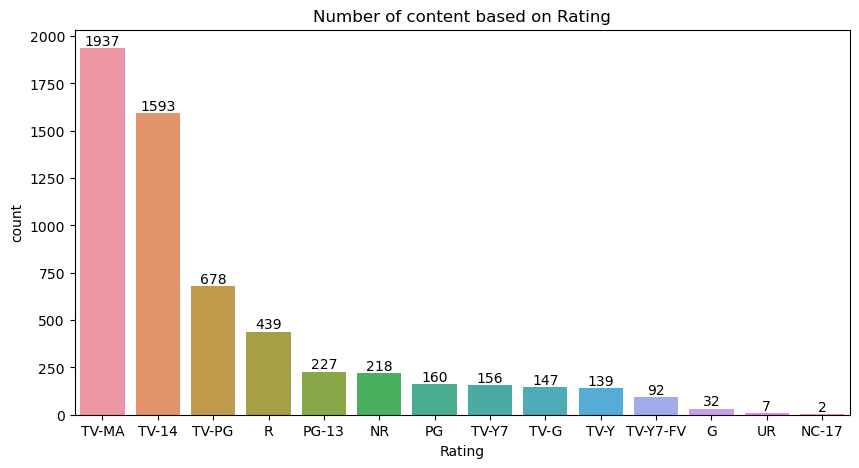

In [70]:
#Creating a subplot axes to plot the visual
fig, ax = plt.subplots(figsize=(10,5))

a = sns.countplot(data=df,x= 'rating', ax=ax, order= df["rating"].value_counts().index)

# For putting values as data labels on the bars
for label in a.containers:
    a.bar_label(label)

plt.title('Number of content based on Rating')
plt.xlabel('Rating')
plt.show()

### Task 2: 
Plot a graph showing the number of TV Shows and Movies across different type of Rating.

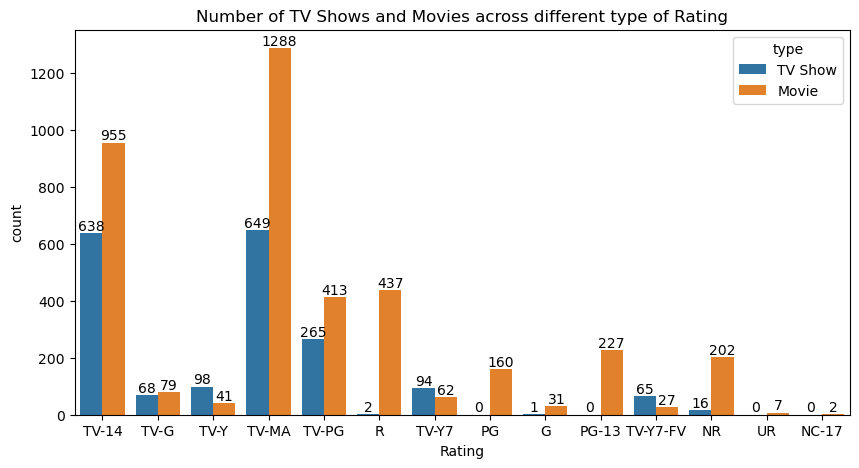

In [71]:
fig, ax = plt.subplots(figsize=(10,5))

c = sns.countplot(data=df,x= 'rating', hue = 'type', ax=ax)

for label in c.containers:
    c.bar_label(label)
    
plt.title('Number of TV Shows and Movies across different type of Rating')
plt.xlabel('Rating')
plt.show()

#### Task 3:  
Compare India, US, Japan, Spain, UK & Canada to check which country produces highest TV Show and Movies.

In [72]:
#Applying groupby on "type" column to get bifurcated data on type categories.
df_type = df.groupby(df["type"])

#Saving desired Countries which needs to be compared in a list, so we can create a new dataframe for analysis.
selected_country = ["India", "United States", "Japan", "Spain", "United Kingdom", "Canada"]

#Finding the number of listed movies produced in each country and saving in a list.
movie_count = []
for i in selected_country:
    m_num = df_type.get_group("Movie").country.str.count(i).sum()
    movie_count.append(m_num)

movie_count

[699.0, 1756.0, 65.0, 130.0, 341.0, 195.0]

In [73]:
#Finding the number of listed "tv show" produced in each country and saving in a list.
tv_count = []
for j in selected_country:
    t_num = df_type.get_group("TV Show").country.str.count(j).sum()
    tv_count.append(t_num)

tv_count

[54.0, 665.0, 151.0, 43.0, 218.0, 105.0]

In [74]:
#Creating a new dataframe with calculated fields to plot the graph with numbers in each country.
data = {"Country" : selected_country,
       "No. of movies" : movie_count,
       "No. of TV Show" : tv_count}

df_country_wise = pd.DataFrame(data)
df_country_wise

,Country,No. of movies,No. of TV Show
0,India,699.0,54.0
1,United States,1756.0,665.0
2,Japan,65.0,151.0
3,Spain,130.0,43.0
4,United Kingdom,341.0,218.0
5,Canada,195.0,105.0


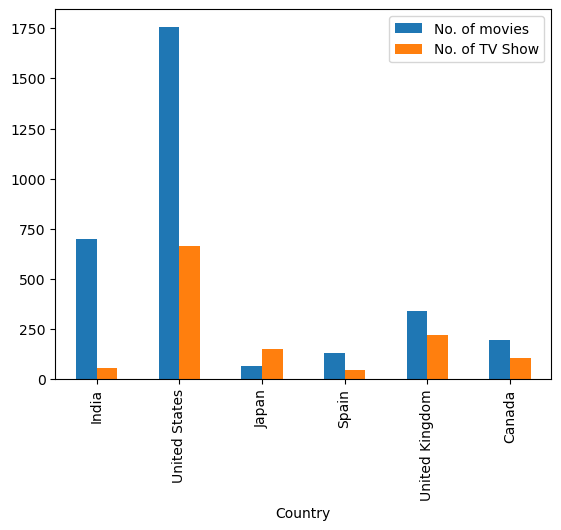

In [88]:
df_country_wise.plot(x= "Country", y= ["No. of movies","No. of TV Show"], kind = "bar")
plt.show()

#### Task 4:  
Plot a graph showing the number of TV Shows and Movies added to Netflix every year.

In [89]:
#Creating a "year" column from date column using split()
df["year_added"] = df["date_added"].str.split(",", expand = True)[1]

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
 12  year_added    5195 non-null   object
dtypes: int64(2), object(11)
memory usage: 592.9+ KB


In [78]:
df["year_added"].value_counts()

 2019    1843
 2018    1629
 2017    1184
 2016     412
 2015      74
 2014      19
 2011      13
 2013       9
 2012       7
 2009       2
 2008       2
 2010       1
Name: year_added, dtype: int64

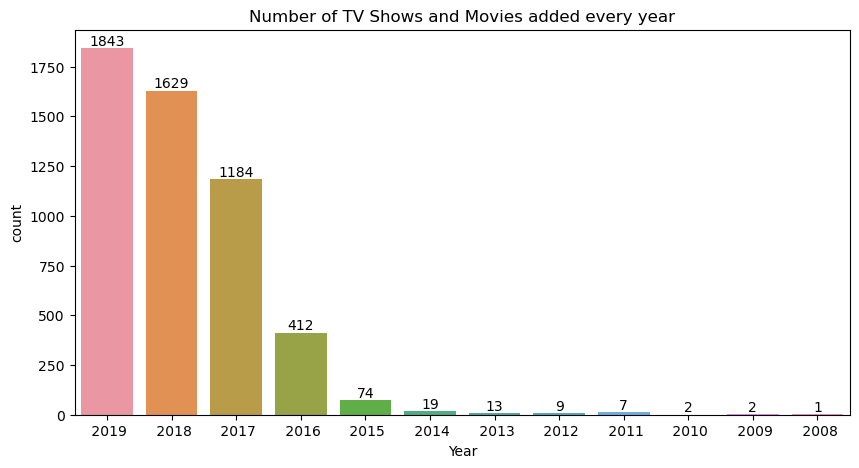

In [92]:
fig, ax = plt.subplots(figsize=(10,5))

c1 = sns.countplot(data=df,x= 'year_added', ax=ax)

abs_val = df["year_added"].value_counts().values

#For data label
c1.bar_label(container = c1.containers[0], labels = abs_val)

plt.title('Number of TV Shows and Movies added every year')
plt.xlabel('Year')
plt.show()

#### Task 5:  
In 2019, Find out if Netflix has added more TV Shows or Movies to their platform and represent the same visually

In [80]:
#removing extra spaces in the string in "year" column
df["year_added"] = df["year_added"].str.strip()

#Checking for the sample value for removed whitespaces
df['year_added'].values[0]

'2019'

In [81]:
df_2019 = df[df["year_added"] == "2019"]
df_2019.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,2019


In [82]:
df_2019["type"].value_counts()

Movie      1367
TV Show     476
Name: type, dtype: int64

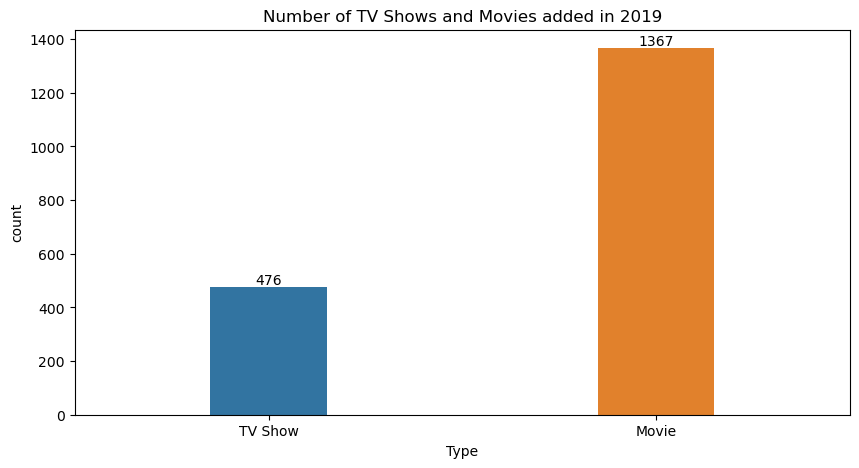

In [96]:
fig, ax = plt.subplots(figsize=(10,5))

#Plotting the number on a bar graph
c2 = sns.countplot(data=df_2019, x='type', ax=ax, width = 0.3)

type_vals = df_2019["type"].value_counts(ascending=True).values

#For data labels
c2.bar_label(container = c2.containers[0], labels = type_vals)

plt.title('Number of TV Shows and Movies added in 2019')
plt.xlabel('Type')
plt.show()